In [139]:
import numpy as np
import matplotlib.pyplot as plt

#For Pytorch import in general
import torch

#Required for the Network
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#Required for the Dataset import and processing
import torchvision
from torchvision import transforms
from torchvision import datasets

%matplotlib

Using matplotlib backend: Qt5Agg


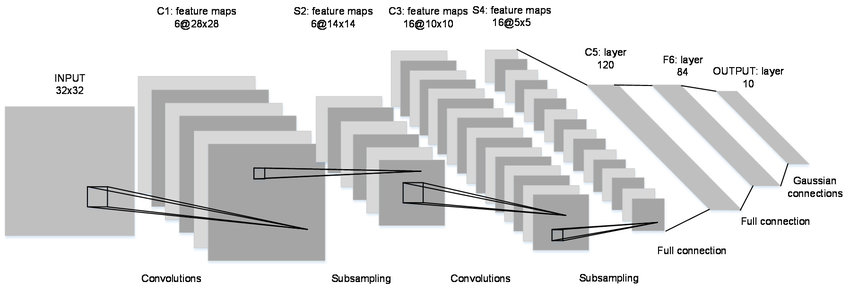
### The <font color=red> LeNet-5 </font> Network(Code)

The Layer name given alongside in the code

In [131]:
class LeNet(nn.Module):
    
    #Constructor Method
    def __init__(self):
        super().__init__()
        self.Conv1=nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5) # for C1
        self.Conv2=nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5) #for C3
        
        self.Linear1=nn.Linear(in_features=16*5*5,out_features=120) #for C5
        self.Linear2=nn.Linear(in_features=120,out_features=84) #for F6
        self.Output=nn.Linear(in_features=84,out_features=10) #for output layer
        
        
    #__The Forward Pass Method
    def forward(self,t):
        
        #__[1] Convolution and Pooling Layer 
        t=self.Conv1(t)
        t=F.tanh(t)
        t=F.avg_pool2d(t,kernel_size=2,stride=2)
        
        #__[2] Convolution and Pooling Layer
        t=self.Conv2(t)
        t=F.tanh(t)
        t=F.avg_pool2d(t,kernel_size=2,stride=2)
        
        #__[3] The First Linear Layer 
        t=t.reshape(-1,16*5*5)
        t=self.Linear1(t)
        t=F.tanh(t)
        
        #__[4] The Second Linear Layer
        t=self.Linear2(t)
        t=F.tanh(t)
        
        #__[5] The Output Linear layer
        t=self.Output(t)
        t=F.softmax(t, dim=1)
        
        #return the resuling Tensor
        return t

### Dataset download and processing 

In [151]:
#The Grayscale converts the RGB image to gray scale
transformation=transforms.Compose([transforms.Grayscale(num_output_channels=1),transforms.ToTensor()])

train_set=datasets.CIFAR10(r'C:\Users\Soumyajit Sarkar\Desktop\Personal Projects\CIFAR10',train=True,download=True,
                           transform=transformation)

test_set=datasets.CIFAR10(r'C:\Users\Soumyajit Sarkar\Desktop\Personal Projects\CIFAR10',train=False,download=True,
                          transform=transformation)

Files already downloaded and verified
Files already downloaded and verified


### DataLoaders for Train and Test (Batch Size=50)

In [133]:
train=torch.utils.data.DataLoader(train_set,batch_size=250,shuffle=True)
test=torch.utils.data.DataLoader(test_set,batch_size=250,shuffle=True)

### Training loop <font color=blue> ( epoch = 100) </font>

In [134]:
# Object for the LeNet class
network = LeNet()

# Object for the SGD class (Stochastic Gradient Descent), which is inside the torch.optim package
# network.parameters() has the weights and lr stands for Learning Rate.
optimizer = optim.SGD(network.parameters(),lr=0.0001)

#List to store total loss and total correct for each epoch
tLoss=[]
tCorrect=[]

# epoch loop
for epoch in range(100):
    total_loss=0
    total_correct=0

    for batch in train:
        #images is a tensor of size 50x1x32x32, 50 because our batch size was of 50.
        images,labels=batch
    
        #Sending the Image tensor to the netwrok
        prediction_from_network= network(images)
    
        #Calculating the loss, using Cross-Entropy loss function
        loss=F.cross_entropy(prediction_from_network,labels)
    
        # Since SGD class has Optim Class as it's Super Class, therefore I can call zero_grad method from optim to 
        # make all the current gradients count = zero, since pytorch keeps on adding the gradients
        optimizer.zero_grad
    
        #Calculate Gradients for this batch of inputs 
        loss.backward()
    
        #Updating the Weights
        optimizer.step()
    
        total_loss+=loss
        total_correct+=prediction_from_network.argmax(dim=1).eq(labels).sum().item()
        
    #accuracy=(total_correct/len(train_set))*100
    
    #print("epoch ",epoch,", The total correct is=",total_correct,", the total loss=",total_loss.item(),
    #      ", Accuracy is=",accuracy)
    
    tLoss.append(total_loss.item())
    tCorrect.append(total_correct)
    
    

In [145]:
t=[((x/len(train_set))*100) for x in tCorrect]
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss change with each epoch")
#plt.plot(t)
plt.plot(tLoss)
plt.show()
plt.ion()

### Test Loop

In [150]:
total_correct_test=0
total_loss_test=0

for test_batch in test:
    image_test,label_test=test_batch
    
    pred_test=network(image_test)
    
    loss_test=F.cross_entropy(pred_test,label_test)
    
    total_correct_test+=pred_test.argmax(dim=1).eq(label_test).sum().item()
    
    total_loss_test+=loss_test
    
print("Total Loss for test run =",total_loss_test.item())

print("Test Accuracy =",(((total_correct_test)/len(test_set))*100))

Total Loss for test run = 85.73223114013672
Test Accuracy = 31.46
